In [1]:
import sys
sys.path.append('/home/mzmighty17')
import warnings
warnings.filterwarnings('ignore') ## ignore warnings
import torchOptics.optics as tt
import numpy as np
import torch

In [2]:
data = np.load('/home/mzmighty17/unknown.npy')
print(type(data))
timg = torch.tensor(data).permute(2,0,1)
print(type(timg))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



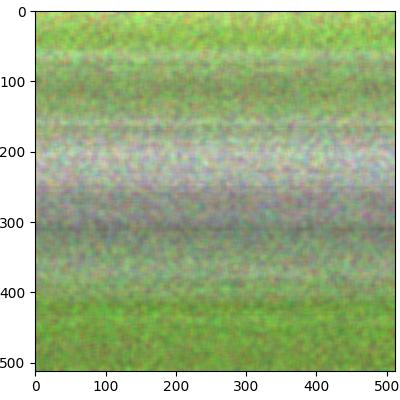

In [3]:
tt.show(timg, figsize=(4,4))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



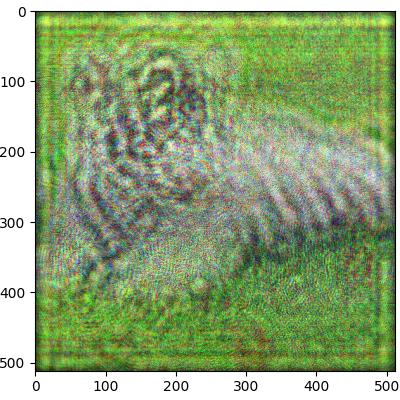

In [4]:
meta = {'wl':(638e-9, 515e-9, 400e-9), 'dx': (6.8e-6, 6.8e-6)}
field = tt.Tensor(timg, meta).clone()
propagate_timg = tt.simulate(field, 30e-3)
tt.show(propagate_timg.abs(), figsize=(4,4))

In [5]:
def fft(field):
    return torch.fft.fftshift(torch.fft.fft2(field))

def get_f(shape, dx):
    ff = [torch.linspace(-1/dx/2, 1/dx/2-1/dx/s, s, dtype=torch.float32) for s in shape[-2:]]
    return torch.meshgrid(ff[0], ff[1])

def get_propagation_kernel(fx, fy, wl, d):
    return torch.exp(-1j * 2 * torch.pi * d * torch.sqrt(1/wl**2 - fx**2 - fy**2))

def ifft(HF):
    return torch.fft.ifft2(torch.fft.ifftshift(HF))

def propagate_field(field, H):
    F = fft(field)
    return ifft(H.unsqueeze(-1)*F)

In [6]:
data = np.load('/home/mzmighty17/unknown.npy')
field = torch.tensor(data, dtype=torch.complex64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


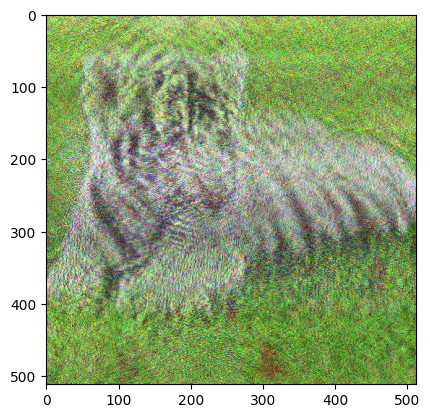

In [22]:
import matplotlib.pyplot as plt
fy, fx = get_f((512,512),6.865e-6)

H = get_propagation_kernel(fx, fy, wl=600e-9, d=30e-3)
prop = propagate_field(field, H)
plt.imshow(prop.abs())